# Advance Image Processing - JPEG Compression 


In [93]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft

In [94]:
# Define DCT functions
def dct2(a):
    return scipy.fft.dct( scipy.fft.dct( a, axis=0, norm='ortho' ), axis=1,norm='ortho' )

def idct2(a):
    return scipy.fft.idct( scipy.fft.idct( a, axis=0 , norm='ortho'), axis=1 ,norm='ortho')

In [95]:
im = Image.open("4.2.07.tiff")

In [96]:
im_array = np.array(im)
R = im_array[:,:,0]
G = im_array[:,:,1]
B = im_array[:,:,2]

In [97]:
# Convert to Y, Cb, Cr
Y=16+65.738*R/256+129.057*G/256+25.064*B/256
Cb=128-37.945*R/256-74.494*G/256+112.439*B/256
Cr=128+112.439*R/256-94.154*G/256-18.285*B/256

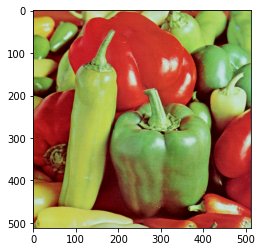

In [98]:
# RGB image
plt.imshow(im)

Text(0.5, 1.0, 'Y')

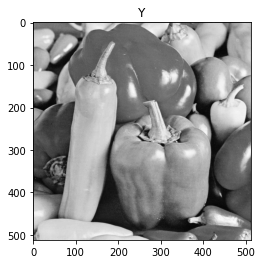

In [99]:
# Y component
plt.imshow(Y,'gray')
plt.title('Y')

Text(0.5, 1.0, 'Cb')

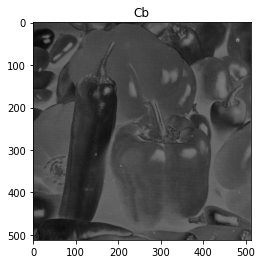

In [100]:
# Cb component
plt.imshow(Cb,'gray')
plt.title('Cb')

Text(0.5, 1.0, 'Cr')

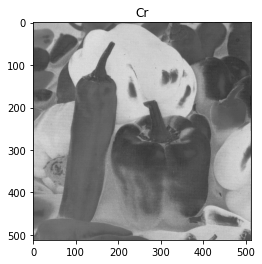

In [101]:
# Cr component
plt.imshow(Cr,'gray')
plt.title('Cr')

# Compression for the whole Image

In [102]:
# Slice into 8x8 blocks
block_size = 8
n_x = int(im.width/block_size)
n_y = int(im.height/block_size)
sliced_Y = np.zeros((n_y,n_x,8,8))
dct_Y = np.zeros((n_y,n_x,8,8))

In [103]:
for i in range(0,n_x):
    for j in range(0,n_y):
        sliced_Y[i,j,:,:] = Y[i*8:i*8+8,j*8:j*8+8]
        dct_Y[i,j,:,:] = dct2(sliced_Y[i,j,:,:])

In [104]:
# Y values of sub-image
sliced_Y[0,0,:,:]

array([[ 41.93569531,  65.85315625,  69.06946094,  70.69521875,
         71.83316406,  64.972     ,  63.05252344,  64.42149219],
       [ 47.58505469, 117.94677344, 113.64235547, 114.35259375,
        114.40240625, 115.36858594, 111.32267187, 107.0878125 ],
       [ 48.35542187, 119.8224375 , 115.08946484, 109.28725781,
        111.90924219, 110.57635156, 114.01592969, 105.44489062],
       [ 47.58505469, 108.95146094, 119.5605    , 109.75960547,
        113.62345703, 113.05835156, 105.78240234, 109.56207812],
       [ 48.61221094, 115.18222266, 122.66428125, 117.12917969,
        110.70173828, 117.0785    , 107.37894531, 112.26995313],
       [ 47.84184375, 113.75485938, 117.26486328, 107.46225391,
        112.88487109, 109.26835937, 113.08239844, 111.05901953],
       [ 46.55789844, 110.28091797, 107.72849219, 112.88315234,
        104.04500781, 113.681     , 110.20275781, 112.05180859],
       [ 46.8146875 , 110.86062109, 114.37149219, 104.27516406,
        110.89411719, 113.1098789

In [105]:
# DCT values of sub-image
dct_Y[0,0,:,:]

array([[ 7.91725083e+02, -7.23562695e+01, -8.33525864e+01,
        -7.04457337e+01, -6.75126743e+01, -4.84042045e+01,
        -2.76265926e+01, -1.39193738e+01],
       [-4.99214031e+01,  1.34122153e+01,  3.09423084e+00,
         7.42390960e+00,  1.04006032e+01,  2.59147572e+00,
         2.60094470e-01,  1.91673192e+00],
       [-5.77441175e+01,  6.03794089e+00,  8.54037440e+00,
         1.28517213e+01,  7.80336711e+00,  6.69167528e+00,
        -2.08234992e+00,  1.17093544e+00],
       [-4.37184155e+01,  6.12649023e+00,  6.62999016e+00,
         1.83753484e+00,  1.19716258e+01,  4.88576657e+00,
         5.12250445e+00, -4.01999802e-01],
       [-3.98396060e+01,  7.83002784e+00,  9.23445140e-01,
         4.39622643e+00,  7.44674658e+00,  3.79806973e+00,
         1.02701622e+01,  4.42725850e+00],
       [-3.74969328e+01,  2.33312200e+00,  7.01858734e+00,
         3.67839191e+00,  9.15440259e+00,  4.44989004e+00,
         3.18568028e+00,  2.40258725e-01],
       [-2.23914561e+01,  5.841895

In [106]:
# Define quantization array
Q10 = np.array([[80,60,50,80,120,200,255,255],
                [55,60,70,95,130,255,255,255],
                [70,65,80,120,200,255,255,255],
                [70,85,110,145,255,255,255,255],
                [90,110,185,255,255,255,255,255],
                [120,175,255,255,255,255,255,255],
                [245,255,255,255,255,255,255,255],
                [255,255,255,255,255,255,255,255]])

Q90 = np.array([[3,2,2,3,5,8,10,12],
                [2,2,3,4,5,12,12,11],
                [3,3,3,5,8,11,14,11],
                [3,3,4,6,10,17,16,12],
                [4,4,7,11,14,22,21,15],
                [5,7,11,13,16,12,23,18],
                [10,13,16,17,21,24,24,21],
                [14,18,19,20,22,20,20,20]])

In [107]:
# Define quantized sub-images
dct_Y_Q10 = np.zeros((n_y,n_x,8,8))
dct_Y_Q90 = np.zeros((n_y,n_x,8,8))

In [108]:
# Quantization with Q10
Q = Q10

for i in range(0,n_x):
    for j in range(0,n_y):
        dct_Y_Q10[i,j,:,:] = np.int16(dct_Y[i,j,:,:] / Q10)

In [109]:
# Quantized DCT values
dct_Y_Q10[0,0,:,:]

array([[ 9., -1., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [110]:
# Quantization with Q90
Q = Q90

for i in range(0,n_x):
    for j in range(0,n_y):
        dct_Y_Q90[i,j,:,:] = np.int16(dct_Y[i,j,:,:] / Q90)

In [111]:
# Quantized DCT values
dct_Y_Q90[0,0,:,:]

array([[263., -36., -41., -23., -13.,  -6.,  -2.,  -1.],
       [-24.,   6.,   1.,   1.,   2.,   0.,   0.,   0.],
       [-19.,   2.,   2.,   2.,   0.,   0.,   0.,   0.],
       [-14.,   2.,   1.,   0.,   1.,   0.,   0.,   0.],
       [ -9.,   1.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ -7.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ -2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [112]:
# Calculate ratio of zeros (Q10)
dct_Y_zeros = 0
dct_Y_Q10_zeros = 0

for i in range(0,n_x):
    for j in range(0,n_y):
        dct_Y_zeros += np.count_nonzero(dct_Y[i,j,:,:] == 0)
        dct_Y_Q10_zeros += np.count_nonzero(dct_Y_Q10[i,j,:,:] == 0)

zeros_ratio = dct_Y_zeros / dct_Y_Q10_zeros
print(dct_Y_zeros ,dct_Y_Q10_zeros ,zeros_ratio)

0 255452 0.0


In [113]:
# Calculate ratio of zeros (Q90)
dct_Y_zeros = 0
dct_Y_Q90_zeros = 0

for i in range(0,n_x):
    for j in range(0,n_y):
        dct_Y_zeros += np.count_nonzero(dct_Y[i,j,:,:] == 0)
        dct_Y_Q90_zeros += np.count_nonzero(dct_Y_Q90[i,j,:,:] == 0)

zeros_ratio = dct_Y_zeros / dct_Y_Q90_zeros
print(dct_Y_zeros ,dct_Y_Q90_zeros ,zeros_ratio)

0 213469 0.0


In [114]:
# Decode into Y
Y_inv_10 = np.zeros((im.height,im.width))
Y_inv_90 = np.zeros((im.height,im.width))

for i in range(0,n_x):
    for j in range(0,n_y):
        Y_inv_10[i*8:i*8+8,j*8:j*8+8] = idct2(dct_Y_Q10[i,j,:,:]*Q10)


for i in range(0,n_x):
    for j in range(0,n_y):
        Y_inv_90[i*8:i*8+8,j*8:j*8+8] = idct2(dct_Y_Q90[i,j,:,:]*Q90)

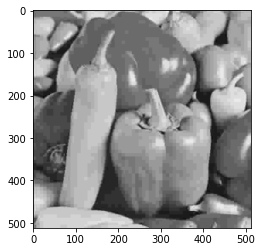

In [115]:
# Decoded Y values for Q10
plt.imshow(Y_inv_10,cmap="gray")

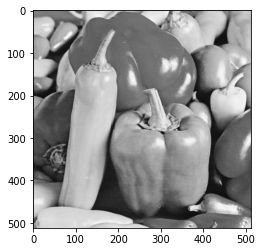

In [116]:
# Decoded Y values for Q90
plt.imshow(Y_inv_90,cmap="gray")

# Compression partial of the Image

In [117]:
# Define DCT functions
def dct2(a):
    return scipy.fft.dct( scipy.fft.dct( a, axis=0, norm='ortho' ), axis=1,norm='ortho' )

def idct2(a):
    return scipy.fft.idct( scipy.fft.idct( a, axis=0 , norm='ortho'), axis=1 ,norm='ortho')

In [118]:
im = Image.open("4.2.07.tiff")

In [119]:
im_array = np.array(im)
R = im_array[:,:,0]
G = im_array[:,:,1]
B = im_array[:,:,2]

In [120]:
# Convert to Y, Cb, Cr
Y=16+65.738*R/256+129.057*G/256+25.064*B/256
Cb=128-37.945*R/256-74.494*G/256+112.439*B/256
Cr=128+112.439*R/256-94.154*G/256-18.285*B/256

In [121]:
# Slice into 8x8 blocks
block_size = 8
n_x = int(im.width/block_size)
n_y = int(im.height/block_size)
sliced_Y = np.zeros((n_y,n_x,8,8))
dct_Y = np.zeros((n_y,n_x,8,8))

In [122]:
for i in range(33,n_x):
    for j in range(1,n_y):
        sliced_Y[i,j,:,:] = Y[(i-33)*8:(i-33)*8+8,(j-1)*8:(j-1)*8+8]
        dct_Y[i,j,:,:] = dct2(sliced_Y[i,j,:,:])

In [123]:
# Y values of sub-image
sliced_Y[33,1,:,:]

array([[ 41.93569531,  65.85315625,  69.06946094,  70.69521875,
         71.83316406,  64.972     ,  63.05252344,  64.42149219],
       [ 47.58505469, 117.94677344, 113.64235547, 114.35259375,
        114.40240625, 115.36858594, 111.32267187, 107.0878125 ],
       [ 48.35542187, 119.8224375 , 115.08946484, 109.28725781,
        111.90924219, 110.57635156, 114.01592969, 105.44489062],
       [ 47.58505469, 108.95146094, 119.5605    , 109.75960547,
        113.62345703, 113.05835156, 105.78240234, 109.56207812],
       [ 48.61221094, 115.18222266, 122.66428125, 117.12917969,
        110.70173828, 117.0785    , 107.37894531, 112.26995313],
       [ 47.84184375, 113.75485938, 117.26486328, 107.46225391,
        112.88487109, 109.26835937, 113.08239844, 111.05901953],
       [ 46.55789844, 110.28091797, 107.72849219, 112.88315234,
        104.04500781, 113.681     , 110.20275781, 112.05180859],
       [ 46.8146875 , 110.86062109, 114.37149219, 104.27516406,
        110.89411719, 113.1098789

In [124]:
# DCT values of sub-image
dct_Y[33,1,:,:]

array([[ 7.91725083e+02, -7.23562695e+01, -8.33525864e+01,
        -7.04457337e+01, -6.75126743e+01, -4.84042045e+01,
        -2.76265926e+01, -1.39193738e+01],
       [-4.99214031e+01,  1.34122153e+01,  3.09423084e+00,
         7.42390960e+00,  1.04006032e+01,  2.59147572e+00,
         2.60094470e-01,  1.91673192e+00],
       [-5.77441175e+01,  6.03794089e+00,  8.54037440e+00,
         1.28517213e+01,  7.80336711e+00,  6.69167528e+00,
        -2.08234992e+00,  1.17093544e+00],
       [-4.37184155e+01,  6.12649023e+00,  6.62999016e+00,
         1.83753484e+00,  1.19716258e+01,  4.88576657e+00,
         5.12250445e+00, -4.01999802e-01],
       [-3.98396060e+01,  7.83002784e+00,  9.23445140e-01,
         4.39622643e+00,  7.44674658e+00,  3.79806973e+00,
         1.02701622e+01,  4.42725850e+00],
       [-3.74969328e+01,  2.33312200e+00,  7.01858734e+00,
         3.67839191e+00,  9.15440259e+00,  4.44989004e+00,
         3.18568028e+00,  2.40258725e-01],
       [-2.23914561e+01,  5.841895

In [125]:
# Define quantization array
Q10 = np.array([[80,60,50,80,120,200,255,255],
                [55,60,70,95,130,255,255,255],
                [70,65,80,120,200,255,255,255],
                [70,85,110,145,255,255,255,255],
                [90,110,185,255,255,255,255,255],
                [120,175,255,255,255,255,255,255],
                [245,255,255,255,255,255,255,255],
                [255,255,255,255,255,255,255,255]])

Q90 = np.array([[3,2,2,3,5,8,10,12],
                [2,2,3,4,5,12,12,11],
                [3,3,3,5,8,11,14,11],
                [3,3,4,6,10,17,16,12],
                [4,4,7,11,14,22,21,15],
                [5,7,11,13,16,12,23,18],
                [10,13,16,17,21,24,24,21],
                [14,18,19,20,22,20,20,20]])

In [126]:
# Define quantized sub-images
dct_Y_Q10 = np.zeros((n_y,n_x,8,8))
dct_Y_Q90 = np.zeros((n_y,n_x,8,8))

In [127]:
# Quantization with Q10
Q = Q10

for i in range(33,n_x):
    for j in range(1,n_y):
        dct_Y_Q10[i,j,:,:] = np.int16(dct_Y[i,j,:,:] / Q10)

In [128]:
# Quantized DCT values
dct_Y_Q10[33,1,:,:]

array([[ 9., -1., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [129]:
# Quantization with Q90
Q = Q90

for i in range(33,n_x):
    for j in range(1,n_y):
        dct_Y_Q90[i,j,:,:] = np.int16(dct_Y[i,j,:,:] / Q90)

In [130]:
# Quantized DCT values
dct_Y_Q90[33,1,:,:]

array([[263., -36., -41., -23., -13.,  -6.,  -2.,  -1.],
       [-24.,   6.,   1.,   1.,   2.,   0.,   0.,   0.],
       [-19.,   2.,   2.,   2.,   0.,   0.,   0.,   0.],
       [-14.,   2.,   1.,   0.,   1.,   0.,   0.,   0.],
       [ -9.,   1.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ -7.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ -2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [131]:
# Calculate ratio of zeros (Q10)
dct_Y_zeros = 0
dct_Y_Q10_zeros = 0

for i in range(33,n_x):
    for j in range(1,n_y):
        dct_Y_zeros += np.count_nonzero(dct_Y[i,j,:,:] == 0)
        dct_Y_Q10_zeros += np.count_nonzero(dct_Y_Q10[i,j,:,:] == 0)

zeros_ratio = dct_Y_zeros / dct_Y_Q10_zeros
print(dct_Y_zeros ,dct_Y_Q10_zeros ,zeros_ratio)

0 121542 0.0


In [132]:
# Calculate ratio of zeros (Q90)
dct_Y_zeros = 0
dct_Y_Q90_zeros = 0

for i in range(33,n_x):
    for j in range(1,n_y):
        dct_Y_zeros += np.count_nonzero(dct_Y[i,j,:,:] == 0)
        dct_Y_Q90_zeros += np.count_nonzero(dct_Y_Q90[i,j,:,:] == 0)

zeros_ratio = dct_Y_zeros / dct_Y_Q90_zeros
print(dct_Y_zeros ,dct_Y_Q90_zeros ,zeros_ratio)

0 101737 0.0


In [133]:
# Decode into Y
Y_inv_10 = np.zeros((im.height,im.width))
Y_inv_90 = np.zeros((im.height,im.width))

for i in range(33,n_x):
    for j in range(1,n_y):
        Y_inv_10[(i-33)*8:(i-33)*8+8,(j-1)*8:(j-1)*8+8] = idct2(dct_Y_Q10[i,j,:,:]*Q10)


for i in range(33,n_x):
    for j in range(1,n_y):
        Y_inv_90[(i-33)*8:(i-33)*8+8,(j-1)*8:(j-1)*8+8] = idct2(dct_Y_Q90[i,j,:,:]*Q90)

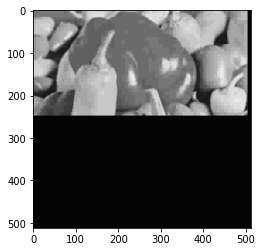

In [134]:
# Decoded Y values for Q10
plt.imshow(Y_inv_10,cmap="gray")

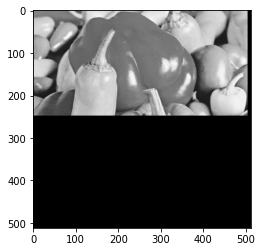

In [135]:
# Decoded Y values for Q90
plt.imshow(Y_inv_90,cmap="gray")